<a href="https://colab.research.google.com/github/Jeevan-Neupane/PyTorch/blob/main/02_Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch Workflow

## What we are covering

In [1]:
what_we_are_covering= {
    1:"Data (Prepare and load)",
    2:"build model",
    3:"fitting the model to data(training)",
    4:"making predictions  and evaluating a model(inference)",
    5:"saving and loading a model",
    6:"putting it all together"
}


In [2]:
what_we_are_covering

{1: 'Data (Prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions  and evaluating a model(inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu121'

## 01. Data (Preparing and Loading)

### To show the two steps of ML
### We are going to create some known data using the linear regression formula


In [15]:
# Create *known* parameter
weight = 0.7
bias = 0.3

start =0
end=1
step =0.02
X= torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X+bias
y[:10]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

In [16]:
len(X),len(y)

(50, 50)

### Split into train and test

In [18]:
train_split  = int(0.8 *len(X));
train_split

40

In [19]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [20]:
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

### Visualize our data

In [23]:
def plot_prediction(train_data=X_train,train_labels=y_train,test_data=X_test, test_labels=  y_test, predictions=None):
  plt.figure(figsize=(10,7));
  #Plot the training data
  plt.scatter(train_data, train_labels,c="b",s=4,label="Training Data");
  #Plot the test data
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data");

  #If predictions are provided
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions");

  plt.legend(prop={"size":14})


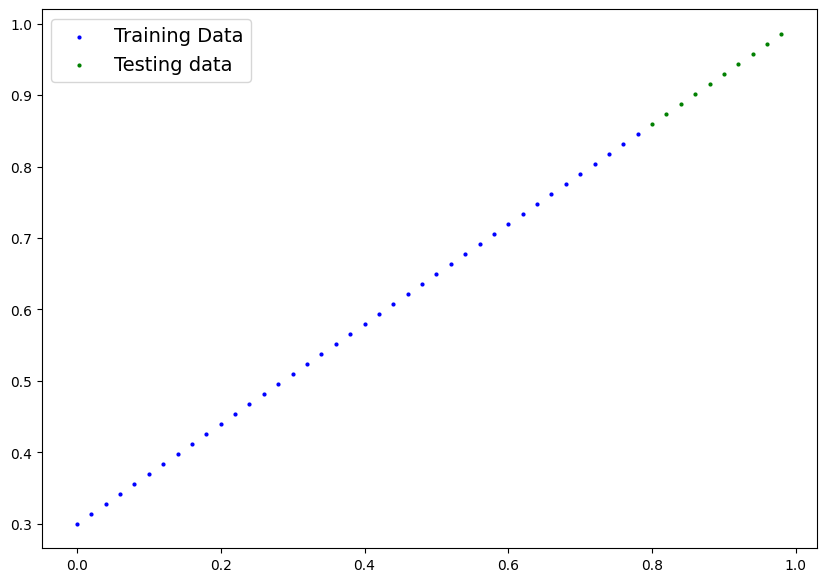

In [24]:
plot_prediction()

## 02. Building a Model For Linear Regression

In [26]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [ ]:
p